In [ ]:
!nvidia-smi

Wed May  4 10:14:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
torch.cuda.is_available()

True

# **Importing Libraries**

In [1]:
!pip install simpletransformers

     |████████████████████████████████| 249 kB 5.4 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 1.8 MB 26.1 MB/s 
     |████████████████████████████████| 10.1 MB 37.5 MB/s 
     |████████████████████████████████| 325 kB 32.0 MB/s 
     |████████████████████████████████| 6.6 MB 33.1 MB/s 
     |████████████████████████████████| 4.0 MB 25.2 MB/s 
     |████████████████████████████████| 1.2 MB 37.5 MB/s 
     |████████████████████████████████| 77 kB 5.1 MB/s 
     |████████████████████████████████| 596 kB 29.6 MB/s 
     |████████████████████████████████| 880 kB 37.7 MB/s 
     |████████████████████████████████| 181 kB 40.7 MB/s 
     |████████████████████████████████| 144 kB 37.1 MB/s 
     |████████████████████████████████| 63 kB 914 kB/s 
     |████████████████████████████████| 1.1 MB 13.5 MB/s 
     |████████████████████████████████| 212 kB 11.0 MB/s 
     |████████████████████████████████| 136 kB 36.1 MB/s 
     |██████████████

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import glob
import os
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Dropout,Bidirectional,Layer
from sklearn import metrics
from sklearn.metrics import classification_report,multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import keras.utils
from keras.utils.vis_utils import plot_model
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Input, Reshape, Dropout
from tensorflow.keras import Model
import csv
from simpletransformers.classification import MultiLabelClassificationModel

# **Reading Data**

In [2]:
#df = pd.read_csv('/Users/datta/tokhinglish/psuedo_data.csv')
df = pd.read_csv('psuedo_data.csv')
df=df.loc[:, ~df.columns.str.match('Unnamed')]
df

,text,label_f,label_h,label_s
0,sir lovehate relationship ke bare mein aap ka...,1,0,0
1,same here he is the reason to watch bb but i c...,0,0,0
2,bhai koi iska rape kar doog main bahut khujli ...,0,0,0
3,buuma raviisha baata karaka pata laga aisa api...,1,0,0
4,gajar mein vitamin c hoty hain jis sey aakhon ...,1,0,0
...,...,...,...,...
10461,bas karo aunty aaplog ka gentle rape ho chuka ...,0,0,0
10462,masti he mohl me chahi khumari he saarey thak ...,0,0,0
10463,dekhna ek din koi inke jindagi ka rape karke c...,0,0,0
10464,aur us waqt kisi ne intolarence hai desh mein ...,0,0,1


In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
df['labels'] = list(zip(df.label_f.tolist(), df.label_h.tolist(), df.label_s.tolist()))
df

,text,label_f,label_h,label_s,labels
0,sir lovehate relationship ke bare mein aap ka...,1,0,0,"(1, 0, 0)"
1,same here he is the reason to watch bb but i c...,0,0,0,"(0, 0, 0)"
2,bhai koi iska rape kar doog main bahut khujli ...,0,0,0,"(0, 0, 0)"
3,buuma raviisha baata karaka pata laga aisa api...,1,0,0,"(1, 0, 0)"
4,gajar mein vitamin c hoty hain jis sey aakhon ...,1,0,0,"(1, 0, 0)"
...,...,...,...,...,...
10461,bas karo aunty aaplog ka gentle rape ho chuka ...,0,0,0,"(0, 0, 0)"
10462,masti he mohl me chahi khumari he saarey thak ...,0,0,0,"(0, 0, 0)"
10463,dekhna ek din koi inke jindagi ka rape karke c...,0,0,0,"(0, 0, 0)"
10464,aur us waqt kisi ne intolarence hai desh mein ...,0,0,1,"(0, 0, 1)"


# **Model Starts**

**Models** 

> 1)Bert-Base-Cased





> 2)Bert-Large-Cased





> 3)Bert-Base-Multilingual-Cased




> 4)Roberta-Base




> 5)Roberta-Large



In [33]:
def classification__report(y_generated,y_test):
  y_generated = y_generated.values.tolist()
  y_pred=[]
  for sample in  y_generated:
    y_pred.append([1 if i>=0.5 else 0 for i in sample ] )
  y_pred = np.array(y_pred)
  y_pred
  print(multilabel_confusion_matrix(y_test, y_pred))
  label_names = ['Label Fake','Label Hate','Label Sentiment']
  print(classification_report(y_test, y_pred,target_names=label_names))

In [34]:
def c_to_l_i(test_dff,k,len2):
  k1_t = []
  for i in range(len2):
    k1_t.append(test_dff[i][k]) 
  return k1_t

In [35]:
def prediction(sub_df1,k,len2):
  k1= []
  for i in range(len2):
    if sub_df1[i][k]<0.5:
     k1.append(0)
    else:
     k1.append(1)
  return k1

In [36]:
def cm_df(k1_t,k1,name,cmap):
  print('                                  '  +name )
  cm = confusion_matrix(k1_t,k1,labels=[0,1])
  cm_df = pd.DataFrame(cm,index = ['0','1'],
                     columns = ['0','1'])
  plt.figure(figsize=(10,5))
  sns.heatmap(cm_df, annot=True, fmt="d", cmap=cmap)
  plt.title('lstm_model:{0:.3f}'.format(accuracy_score(k1_t,k1)))
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()
  print('                                  ')
  print('                                  ')
  print('                                  ')

In [37]:
def testing(sub_df,test_dff):
  sub_df1 = sub_df.values.tolist()
  test_dff=np.array(test_dff)
  len2 = test_dff.shape[0]
  f1_t = c_to_l_i(test_dff,0,len2)
  f1 = prediction(sub_df1,0,len2)
  h1_t = c_to_l_i(test_dff,1,len2)
  h1 = prediction(sub_df1,1,len2)
  s1_t = c_to_l_i(test_dff,2,len2)
  s1 = prediction(sub_df1,2,len2)
  cm_df(f1_t,f1,'Fake','gist_heat')
  cm_df(h1_t,h1,'Hate','YlOrRd')
  cm_df(s1_t,s1,'Sentiment','PuBu')

In [38]:
def bert_model_s(df,var,model_name,epochs,name):
  df = df.drop(['label_f','label_h','label_s'],axis = 1)
  train_df1, eval_df = train_test_split(df, test_size=0.2,random_state=41)
  train_df, test_df = train_test_split(train_df1, test_size=0.2,random_state=41)
  model = MultiLabelClassificationModel(var,model_name, num_labels=3,args={'train_batch_size':2, 'gradient_accumulation_steps':16, 'learning_rate': 3e-5, 'num_train_epochs':epochs, 'max_seq_length': 200})
  model.train_model(train_df,output_dir=name)
  #plot_model(model,show_layer_names=True,show_shapes=True)
  result, model_outputs, wrong_predictions = model.eval_model(eval_df)
  test_df2 = test_df
  test_df = test_df.drop(['labels'],axis=1)
  test_dff = test_df2['labels'].values.tolist()
  to_predict = test_df.text.apply(lambda x: x.replace('\n', ' ')).tolist()
  preds, outputs = model.predict(to_predict)
  sub_df = pd.DataFrame(outputs, columns=['fake','hate','sentiment'])
  classification__report(sub_df,test_dff)
  testing(sub_df,test_dff)
  print("Result")
  pred1 = sub_df.values.tolist()
  print('Predicted Values')
  print(pred1)
  y_pred = []
  for sample in  pred1:
    y_pred.append([1 if i>=0.5 else 0 for i in sample ] )
  y_pred = np.array(y_pred)
  print('Predicted Labels')
  print(y_pred)
  print('Accuracy Score:' + str(accuracy_score(np.array(y_pred),np.array(test_dff))))
  return result,model_outputs,wrong_predictions

# **Bert Base**

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMultiLabelSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMultiLabelSequenceClassification were not in

  0%|          | 0/6697 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/3349 [00:00<?, ?it/s]

  0%|          | 0/2094 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/262 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/210 [00:00<?, ?it/s]

[[[ 364  280]
  [ 193  838]]

 [[1348   56]
  [ 176   95]]

 [[ 892  184]
  [ 326  273]]]
                 precision    recall  f1-score   support

     Label Fake       0.75      0.81      0.78      1031
     Label Hate       0.63      0.35      0.45       271
Label Sentiment       0.60      0.46      0.52       599

      micro avg       0.70      0.63      0.67      1901
      macro avg       0.66      0.54      0.58      1901
   weighted avg       0.68      0.63      0.65      1901
    samples avg       0.55      0.53      0.52      1901

                                  Fake


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


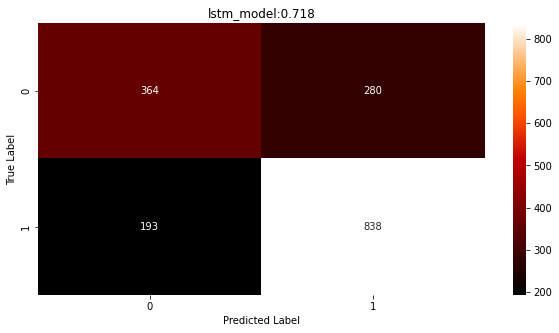

                                  
                                  
                                  
                                  Hate


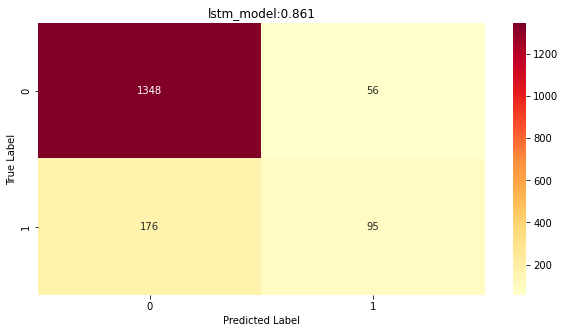

                                  
                                  
                                  
                                  Sentiment


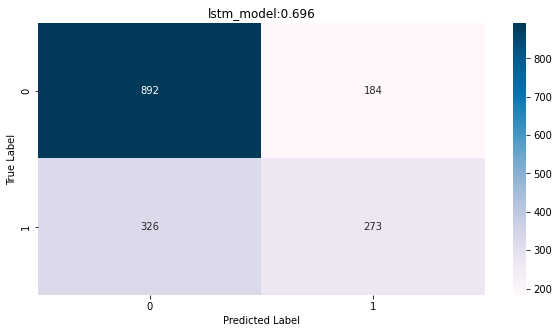

                                  
                                  
                                  
Result
Predicted Values
[[0.40625, 0.05877685546875, 0.6328125], [0.857421875, 0.07989501953125, 0.53955078125], [0.5546875, 0.394775390625, 0.183837890625], [0.353515625, 0.06982421875, 0.44580078125], [0.41162109375, 0.37158203125, 0.184326171875], [0.69677734375, 0.342529296875, 0.21435546875], [0.5859375, 0.66552734375, 0.16943359375], [0.79833984375, 0.03759765625, 0.4990234375], [0.449951171875, 0.37353515625, 0.193115234375], [0.6044921875, 0.04779052734375, 0.497314453125], [0.65869140625, 0.3662109375, 0.1763916015625], [0.77587890625, 0.038818359375, 0.5078125], [0.435791015625, 0.54541015625, 0.1705322265625], [0.8662109375, 0.048858642578125, 0.431396484375], [0.505859375, 0.67626953125, 0.16357421875], [0.529296875, 0.054107666015625, 0.70654296875], [0.603515625, 0.5087890625, 0.181396484375], [0.541015625, 0.51708984375, 0.171142578125], [0.346923828125, 0.05966186523

In [39]:
result1,model_outputs1,wrong_predictions1  = bert_model_s(df,'bert','bert-base-cased',5,'output_0')

In [40]:
result1

{'LRAP': 0.9161493155046141, 'eval_loss': 0.49435098901504776}

In [41]:
model_outputs1

array([[0.58691406, 0.65380859, 0.16308594],
       [0.54980469, 0.04553223, 0.65673828],
       [0.85888672, 0.06210327, 0.40478516],
       ...,
       [0.50292969, 0.04830933, 0.65087891],
       [0.88427734, 0.08050537, 0.35913086],
       [0.77148438, 0.03839111, 0.45458984]])

In [42]:
wrong_predictions1

[{'guid': 1, 'text_a': 'ok sallu bhai', 'text_b': None, 'label': (0, 0, 1)},
 {'guid': 4, 'text_a': 'swachchh bharat aviyaan ke liye danyabaad', 'text_b': None, 'label': (1, 0, 0)},
 {'guid': 5, 'text_a': 'advance eid mubarak salman bhai', 'text_b': None, 'label': (0, 0, 1)},
 {'guid': 12, 'text_a': 'salman khan dest actar bollywood', 'text_b': None, 'label': (0, 0, 0)},
 {'guid': 13, 'text_a': 'jumme ka din hai  chatting ki baat hai allah bachaye mujhe  fake pages se', 'text_b': None, 'label': (1, 0, 1)},
 {'guid': 16, 'text_a': 'timepass toh #pogo pe bhi', 'text_b': None, 'label': (0, 0, 1)},
 {'guid': 18, 'text_a': 'mera beta aap ko bahot pasand krta hai', 'text_b': None, 'label': (1, 0, 0)},
 {'guid': 20, 'text_a': 'tab batana v sadi ar v sadi m antar aur haan jo rape ki ghtnaye ho rahi hai to tumhra kun ku thanda pada h ya rasta deekh rahe ho jb apna ghr jalega tb dekhrnge peso ki bhuk me tum jese log nange ho sakte hai rajput samman ke liye jaan dete h', 'text_b': None, 'label': 

# **Bert-Large**

In [ ]:
result2,model_outputs2,wrong_predictions2  = bert_model_s(df,'bert','bert-large-cased',5,'output_1')

In [ ]:
result2

{'LRAP': 0.9190544412607428, 'eval_loss': 0.49420941319629436}

In [ ]:
model_outputs2

(2094, 3)

In [ ]:
wrong_predictions2

# **MultiLingual Bert**

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMultiLabelSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMultiLabelSequenceClassificatio

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

  0%|          | 0/6697 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/3349 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/3349 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/3349 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/3349 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/3349 [00:00<?, ?it/s]

  0%|          | 0/2094 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/262 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/210 [00:00<?, ?it/s]

[[[ 427  217]
  [ 198  833]]

 [[1319   85]
  [ 145  126]]

 [[ 904  172]
  [ 227  372]]]
                 precision    recall  f1-score   support

     Label Fake       0.79      0.81      0.80      1031
     Label Hate       0.60      0.46      0.52       271
Label Sentiment       0.68      0.62      0.65       599

      micro avg       0.74      0.70      0.72      1901
      macro avg       0.69      0.63      0.66      1901
   weighted avg       0.73      0.70      0.71      1901
    samples avg       0.59      0.58      0.56      1901

                                  Fake


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


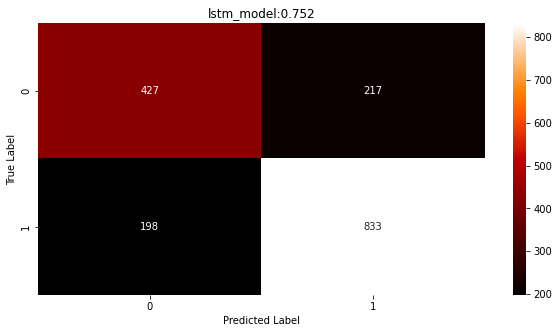

                                  
                                  
                                  
                                  Hate


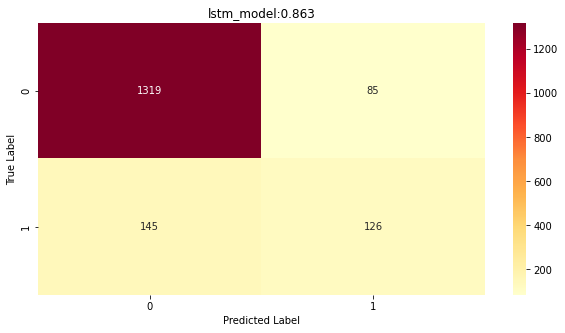

                                  
                                  
                                  
                                  Sentiment


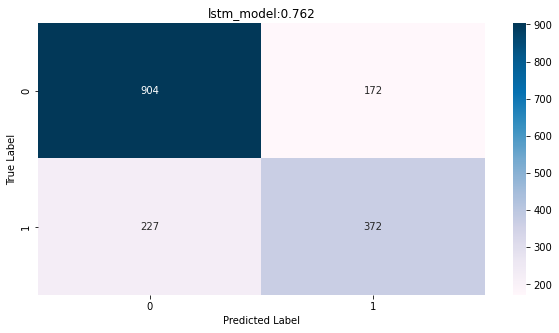

                                  
                                  
                                  
Result
Predicted Values
[[0.061309814453125, 0.0120086669921875, 0.179443359375], [0.97998046875, 0.0197601318359375, 0.06890869140625], [0.0244293212890625, 0.1639404296875, 0.263427734375], [0.01107025146484375, 0.056121826171875, 0.449462890625], [0.76220703125, 0.038177490234375, 0.02752685546875], [0.9853515625, 0.395751953125, 0.259521484375], [0.9658203125, 0.86083984375, 0.056640625], [0.9912109375, 0.03643798828125, 0.141357421875], [0.09271240234375, 0.76611328125, 0.03125], [0.830078125, 0.06451416015625, 0.03192138671875], [0.9033203125, 0.68896484375, 0.01406097412109375], [0.9853515625, 0.0170440673828125, 0.352294921875], [0.10015869140625, 0.8017578125, 0.0230712890625], [0.96533203125, 0.00634002685546875, 0.439208984375], [0.68408203125, 0.9765625, 0.1007080078125], [0.0775146484375, 0.019195556640625, 0.9287109375], [0.83740234375, 0.7548828125, 0.0156021118164062

In [43]:
result3,model_outputs3,wrong_predictions3 = bert_model_s(df,'bert','bert-base-multilingual-cased',5,'output_2')

In [44]:
result3

{'LRAP': 0.9272524673670783, 'eval_loss': 0.5230438017094409}

In [45]:
model_outputs3

array([[0.86425781, 0.92871094, 0.03253174],
       [0.39550781, 0.00888062, 0.93896484],
       [0.9921875 , 0.03240967, 0.25146484],
       ...,
       [0.45556641, 0.00333786, 0.58447266],
       [0.98486328, 0.02049255, 0.10266113],
       [0.93310547, 0.00641251, 0.10577393]])

In [46]:
wrong_predictions3

[{'guid': 3, 'text_a': 'aisa kuch nahi i hate it', 'text_b': None, 'label': (0, 1, 0)},
 {'guid': 4, 'text_a': 'swachchh bharat aviyaan ke liye danyabaad', 'text_b': None, 'label': (1, 0, 0)},
 {'guid': 5, 'text_a': 'advance eid mubarak salman bhai', 'text_b': None, 'label': (0, 0, 1)},
 {'guid': 10, 'text_a': 'g bolkar g ka speed mil raha hai ye sara sar dokha hai i hate jio', 'text_b': None, 'label': (1, 1, 0)},
 {'guid': 12, 'text_a': 'salman khan dest actar bollywood', 'text_b': None, 'label': (0, 0, 0)},
 {'guid': 13, 'text_a': 'jumme ka din hai  chatting ki baat hai allah bachaye mujhe  fake pages se', 'text_b': None, 'label': (1, 0, 1)},
 {'guid': 14, 'text_a': ' lakhdays abe dhakan islam sirf  saal purana hai tum sab ko rape karke marke conversion karke mulla banaya  sandiprnc https  twittercom lakhdays status ', 'text_b': None, 'label': (0, 0, 0)},
 {'guid': 16, 'text_a': 'timepass toh #pogo pe bhi', 'text_b': None, 'label': (0, 0, 1)},
 {'guid': 17, 'text_a': 'kaahe ka balida

# **Roberta Base**

In [ ]:
result4,model_outputs4,wrong_predictions4  = bert_model_s(df,'roberta', 'roberta-base',5,'output_3')

In [ ]:
result4

{'LRAP': 0.9190544412607428, 'eval_loss': 0.49420941319629436}

In [ ]:
model_outputs4

(2094, 3)

In [ ]:
wrong_predictions4

# **Roberta Large**

In [ ]:
result5,model_outputs5,wrong_predictions5=  bert_model_s(df,'roberta', 'roberta-large',5,'output_4')

In [ ]:
result5

In [ ]:
model_outputs5

In [ ]:
wrong_predictions5